# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to, 
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

**I have combined the Writeup with the Report itself, so that the reviewer don't have to search for multiple files while reviewing. It has also been suggested to be a good practice**

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file   = 'data/train.p'
validation_file = 'data/valid.p'
testing_file    = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test  = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test,  y_test  = test['features'], test['labels']

print("Training keys: {}".format(train.keys()))
print("X_train shape: {}, y_train shape: {}".format(X_train.shape, y_train.shape))
print("X_valid shape: {}, y_valid shape:{}".format(X_valid.shape, y_valid.shape)) 
print("X_test shape: {}, y_test shape:{}".format(X_test.shape, y_test.shape))

Training keys: dict_keys(['coords', 'labels', 'features', 'sizes'])
X_train shape: (34799, 32, 32, 3), y_train shape: (34799,)
X_valid shape: (4410, 32, 32, 3), y_valid shape:(4410,)
X_test shape: (12630, 32, 32, 3), y_test shape:(12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training, validation and testing examples
n_train      = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test       = X_test.shape[0]

# TODO: What's the shape of a traffic sign image?
# TODO: How many unique classes/labels there are in the dataset.
image_shape  = X_train[0].shape
n_classes    = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validating examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validating examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Discussion (1): 
**<i> Data Set Summary</i>**

All datasets: Training, Validation and Testing Sets are present in "/data" folder in this Repository. From above, we get that:
1. There are 34799 training samples.
2. The validation set has 4410 samples.
3. The test set has 12630 samples.
4. Every sample is a (32x32x3) image of type "uint8" - an 8-bit image.
5. There are 43 different classes.

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#### Display a few random images

Let's check a very small subset of, say 100 random images.

Every time the code in the cell below is executed, a significant fraction of the displayed images appears too dark to be recognized even by a human eye. Some images are pixelated, blurred, overexposed or underexposed which makes their classification somewhat challenging. 

To examine the whole dataset like this, let's perform **histogram analysis** to detect the over-exposure and under-exposure across the entire training dataset.

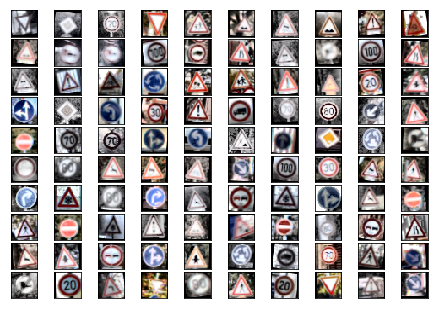

In [41]:
### Plot some random images from the training dataset.
import numpy.random as rnd
import matplotlib.gridspec as gridspec

def plot_random_samples(images,n=100):
    sample_ids = rnd.randint(0,len(images),n)
    samples = images[sample_ids]
    
    grid_size = int(np.ceil(n/10))
    gs = gridspec.GridSpec(grid_size, 10, top=1., bottom=0., right=1., left=0., hspace=0.1, wspace=0.05)
    for index,g in enumerate(gs):
        ax = plt.subplot(g)
        ax.imshow(samples[index])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

plot_random_samples(X_train)

#### Histogram Analysis (for Training Set)

- 1. The pixel intensity of each image is averaged over all three channels.
- 2. A histogram is then calculated over all images in the training set. 

**`Observation`**: The histogram shows most of the intensity levels between '0-50' and a tall spike around the intensity level '255'.  
**`Inference`**: There are a large number of images with very-dark pixels or very bright pixels.

- 3. To more analyse the overall brightness spread over the dataset, a <u>Cumulative Histogram</u> is plotted.

**`Observation`**: If the intensity levels are divided into 5 parts - very dark, dark, medium, light and very light, nearly 60% of the pixels fall in the very dark & dark categories, while only about 10% of the pixels fall in the light & very light ones.  
**`Inference`**: Underexposure is largely distributed over the training dataset. <u>Histogram Equalization</u> may improve this.

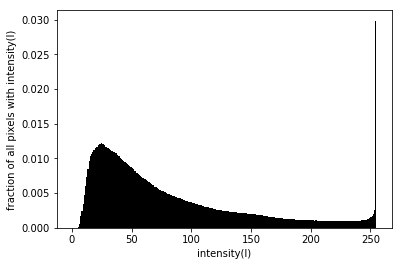

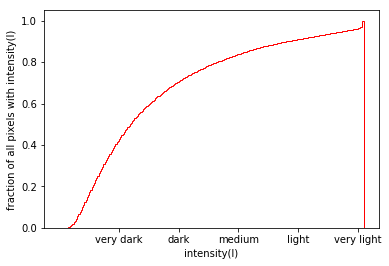

In [5]:
### Plot histogrm of all images in the training dataset.
### It's computed by averaging pixel intensities over all three channels.
def hist_img_data(X):
    plt.hist(np.mean(X,axis=3).flatten(), bins=range(256), color='k', normed=True)
    plt.xlabel('intensity(I)')
    plt.ylabel('fraction of all pixels with intensity(I)')
    plt.show()

    plt.hist(np.mean(X,axis=3).flatten(), bins=range(256), color='r', normed=True, cumulative=True, histtype='step')
    plt.xlabel('intensity(I)')
    plt.xticks([50,100,150,200,250],['very dark', 'dark', 'medium','light','very light'])
    plt.ylabel('fraction of all pixels with intensity(I)')
    plt.show()

hist_img_data(X_train)

#### Analyze Data Skewness

Checking for Data skewness would give a visualisation of spread of the image samples over different class labels. Histograms of class labels for training, validation and test sets are plotted below.

**`Observation`**: In all different sets, class distribution is not almost uniform. In the training set, a few labels have around 2000 samples while many other labels have a low sample count around or in range of 200-400. Similar skew happens to be present in other two datasets.  
**`Comment`**: By some <u>Data Augmentation</u> techniques, we shall add more images to the class with low sample count.

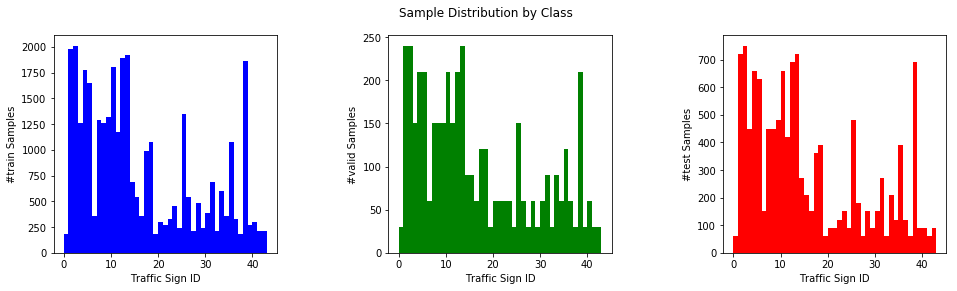

In [6]:
## Plot frequency of each type of traffic sign in given different datasets.
def hist_labels(datasets=None,ylabels=None,color=None):
    fig = plt.figure(figsize=(16,4))
    

    for i in range(len(datasets)):
        axis = fig.add_subplot(1,3,i+1)
        axis.hist(datasets[i], bins=range(n_classes+1), color=color[i])
        plt.xlabel('Traffic Sign ID')
        plt.ylabel('#{} Samples'.format(ylabels[i]))

    fig.subplots_adjust(wspace=0.5)
    plt.suptitle("Sample Distribution by Class")    
    plt.show()
    
hist_labels(datasets = [y_train,y_valid, y_test], ylabels = ['train','valid','test'], color = ['b','g','r'])

#### Display every class image

This tells about the label and id of each given class.

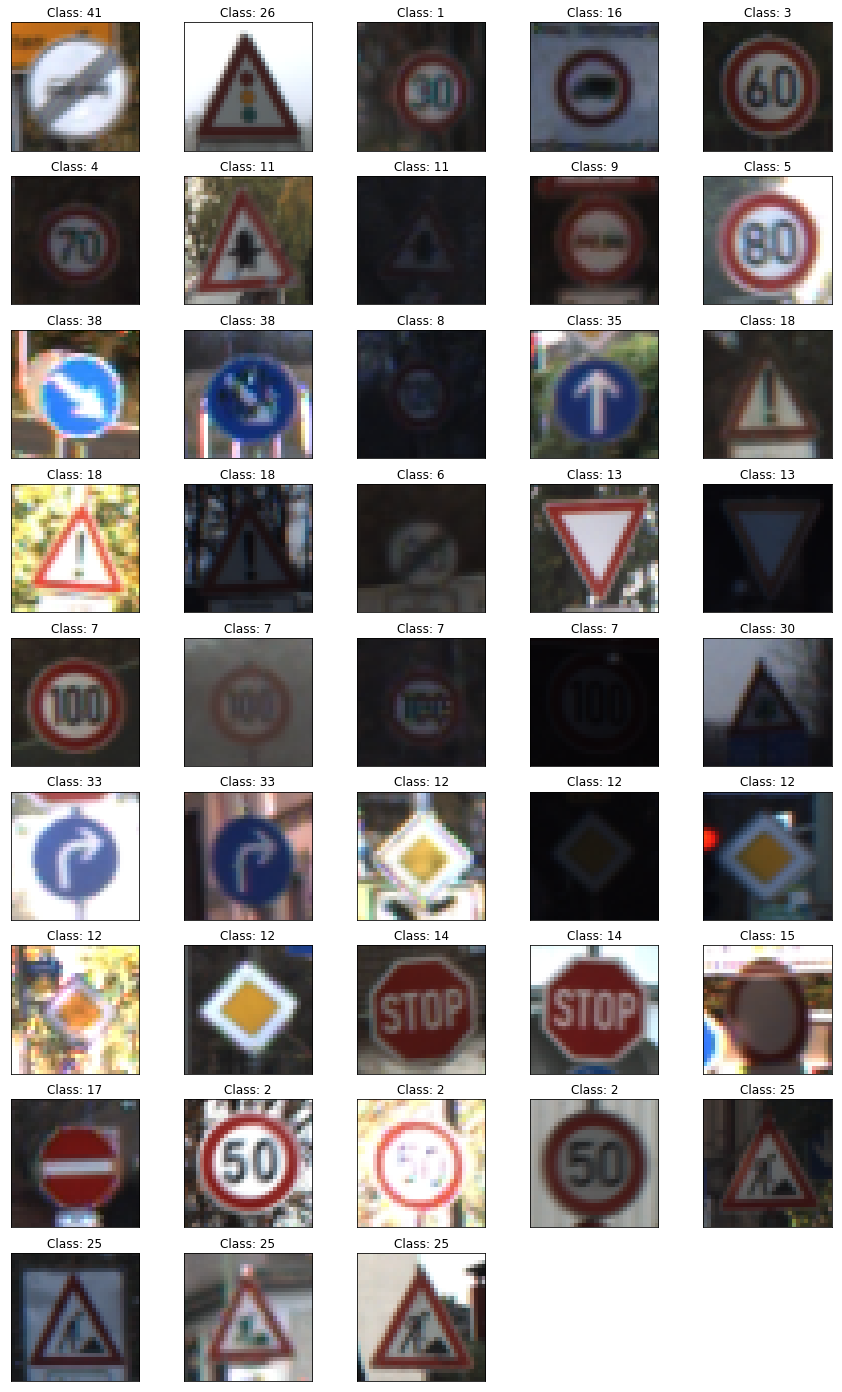

In [7]:
import random

# Count samples in each class in training set
count_train = np.zeros(n_classes)

for i in range(n_train):
    idx = int(y_train[i])
    count_train[idx] += 1
    
# Count upper and lower bounds of classes
limbounds = np.zeros([n_classes,2])

limbounds[0,0] = 0
limbounds[0,1] = count_train[0]

for i in range(1,n_classes):
    limbounds[i,0] = limbounds[i-1,1]+1
    limbounds[i,1] = limbounds[i,0]+count_train[i]-1

c = 0
plt.figure(figsize=(15,25))

for i in range(n_classes):
    plt.subplot(9,5,i+1)
    index = random.randint(limbounds[i,0], limbounds[i,1])
    image = X_train[index].squeeze()
    plt.title('Class: ' + str(y_train[index]))
    
    fig = plt.imshow(image)
    
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

### Discussion (2): 
**<i> Data Exploration/Visualization</i>**

1. Visualing Random Image Samples
> Some 100 random samples from the training set are plotted above in a 10x10 grid. Among many of the reasons that make some of these samples hard to recognize are commonly 'Motion blur', 'images under low or very high light-exposure'. We can get simiar results for the random images by repeating this step.
2. Analyzing Image Exposure
> A simple histogram and a cumulative histogram of all images in the training set are plotted above to find the extent of under/over-exposure. The Simple Histogram plot shows a massive hump centered around brightness level '30-35' and a tall spike at around brightness level '255'. The Cumulative Histogram plot shows that around 60-70% of pixels have brightness level below 100.
3. Dataset Skew Analysis
> Histograms for Training, Validation and Testing Sets are plotted to visualise the frequency of class labels. All the plots show similar trend of sample distribution over classes, i.e. many classes have around 10 times fewer number of samples than those in other classes which have large number of sample. So, the data is mostly skewed and not good enough to train the model.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

> Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#### Apply Histogram Equalization

As told above, Histogram equalization is applied on all different datasets at hand. The modified histogram for training data is plotted. Random images from the dataset, now, look clearer to the naked eye.

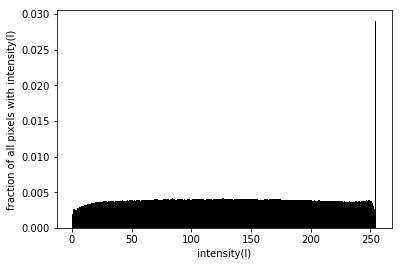

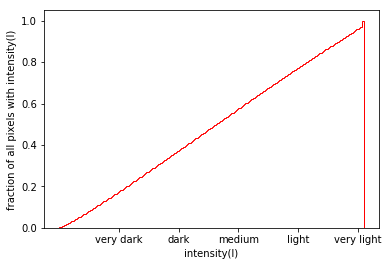

In [9]:
# Apply Histogram Equalization
import cv2

def hist_equalize(X):
    for i in range(X.shape[0]):
        img_rgb = X[i,:,:,:]
        img_yuv = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2YUV)
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        X[i,:,:,:] = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2RGB)
    return X

X_train = hist_equalize(X_train)
X_valid = hist_equalize(X_valid)
X_test  = hist_equalize(X_test)

hist_img_data(X_train)

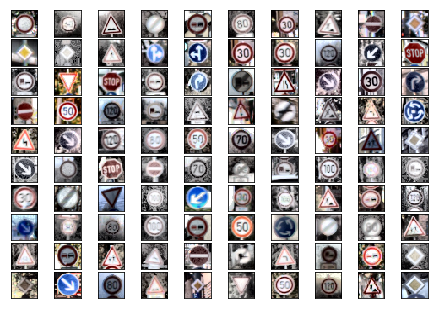

In [10]:
# Visualise some random modified images from the training set.
plot_random_samples(X_train)

Now that the images are modified to make it easy for the classifier and to positively contribute to its accuracy, Let's,

#### Augment the training dataset

> As the training dataset is largely skewed, i.e. most of the classes have very less example records as compared to other classes, it implies that the classifier model will not be accurately generalised to those down-sampled clases which will result in lower accuracy.

Therefore,
- 1. More data is generated or augmented for every class such that every class has almost uniform number of samples. This is done by applying simple, "<u>random affine transformations</u>" to every (random) image in the training dataset. 
- 2. The number of copies generated per image depends on the number of existing samples in its class. This makes the number of samples in every class roughly of the same order.

In [11]:
import cv2

# Configuration Constants
MIN_ROTATION = -10.0
MAX_ROTATION =  10.0

MIN_OFFSET = -2
MAX_OFFSET = 2

MIN_PIXEL_POSITION = 12
MAX_PIXEL_POSITION = 20

# Apply 'Random Transformations' on the images.
# These methods were suggested in the Project webinar.
def apply_random_affine(img,n):
    
    # Allocate an array for holding all transformed images.
    output  = np.zeros(shape=[n,*img.shape], dtype=img.dtype)
    
    # Generate random centers and angles for rotation.
    angles  = (MAX_ROTATION-MIN_ROTATION) * np.random.random(n) + MIN_ROTATION
    centers = np.random.randint(MIN_PIXEL_POSITION, MAX_PIXEL_POSITION+1, size=[n,2])
    
    # Generate random offsets for translation.
    offsets = np.random.randint(MIN_OFFSET, MAX_OFFSET+1, size=[n,2])
    
    # Generate transformed copies of input image.
    for i in range(n):
        M_rotate = cv2.getRotationMatrix2D(tuple(centers[i,:]), angles[i], 1)
        tmp = cv2.warpAffine(img, M_rotate, None)
        
        M_translate = np.float32([[1, 0, offsets[i,0]], [0, 1, offsets[i,1]]])
        output[i] = cv2.warpAffine(tmp, M_translate, img.shape[:2])
    
    return output
        
# Add Image Copies with Transformations.
def add_variants(X,y,n_copies):
    
    #Initialize output dataset with original data.
    X_out = np.copy(X)
    y_out = np.copy(y)
    
    # Generate copies for every image in the original dataset.
    # Append these copies and corresponding labels to output dataset.
    m = len(X)
    for i in range(m):
        variant_data = apply_random_affine(X[i], n_copies)
        X_out = np.vstack((X_out, variant_data))

        variant_labels = np.array([y[0]]*n_copies, dtype=y.dtype)
        y_out = np.concatenate((y_out, variant_labels))
    
    return (X_out, y_out)

 
def augment_data(X,y,MIN_EXAMPLE_COUNT = 1000):
    
    # Get sample count for every class label.
    # For np.histogram to work correctly with 0-based labels,
    # the number of bins has to be 1 more than the number of
    # classes.
    counts, labels = np.histogram(y, bins = range(n_classes+1))
    
    # Initilize empty output arrays. These will be filled with
    # original and transformed samples.
    data_shape = X.shape[1:]
    data_type  = X.dtype
    
    label_shape = y.shape[1:]
    label_type  = y.dtype
    
    X_out = np.empty(shape=[0,*data_shape],dtype=data_type)
    y_out = np.empty(shape=[0,*label_shape],dtype=label_type)
    
    # For every class, generate an appropriate number of synthetic samples.
    # np.histogram() above will generate one extra label
    # that we don't iterate over.
    for label in labels[:-1]:
        X_label = X[y==label]
        y_label = y[y==label]
        
        n_orig = len(y_label)
        
        if(counts[label] < 0.5 * MIN_EXAMPLE_COUNT):
            n_copies = MIN_EXAMPLE_COUNT//counts[label]
            X_label, y_label = add_variants(X_label, y_label, n_copies)
            
        n_total = len(y_label)
        
        X_out = np.concatenate((X_out, X_label))
        y_out = np.concatenate((y_out, y_label))
            
        print("Class label {}, original sample count {}, updated sample count {}"\
              .format(label,n_orig,n_total))
        
    return (X_out, y_out)


In [12]:
### Augment the Training Set.

X_train, y_train = augment_data(X_train, y_train, MIN_EXAMPLE_COUNT=5000)
# X_valid, y_valid = augment_data(X_valid, y_valid, MIN_EXAMPLE_COUNT=800)

Class label 0, original sample count 180, updated sample count 5040
Class label 1, original sample count 1980, updated sample count 5940
Class label 2, original sample count 2010, updated sample count 6030
Class label 3, original sample count 1260, updated sample count 5040
Class label 4, original sample count 1770, updated sample count 5310
Class label 5, original sample count 1650, updated sample count 6600
Class label 6, original sample count 360, updated sample count 5040
Class label 7, original sample count 1290, updated sample count 5160
Class label 8, original sample count 1260, updated sample count 5040
Class label 9, original sample count 1320, updated sample count 5280
Class label 10, original sample count 1800, updated sample count 5400
Class label 11, original sample count 1170, updated sample count 5850
Class label 12, original sample count 1890, updated sample count 5670
Class label 13, original sample count 1920, updated sample count 5760
Class label 14, original sample 

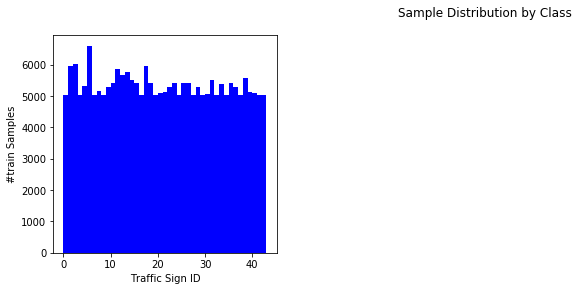

In [13]:
# Plot Histogram for the newly modified Training set.
hist_labels(datasets = [y_train], ylabels = ['train'], color = ['b'])

#### Normalizing pixel intensities

In the original datasets, pixel values are in the range [0,255]. 
- 1. The values are normalized the subtracting channel-wise mean intensities and dividing by the corresponding pixel standard deviations. 
- 2. The mean and standard deviation are calculated from training data and used to normalize all given different datasets.

In [14]:
### Calculate per-channel pixel mean and std deviation.
### An alternative would be to use per channel mean image.

pixel_means   = np.mean(X_train, axis=(0,1,2), dtype=np.float32)
pixel_stddevs = np.std(X_train, axis=(0,1,2), dtype=np.float32)
print ("For one training example,")
print ("Channel-wise Mean: {} AND Channel-wise Standard Deviation: {}".format(pixel_means[0], pixel_stddevs[0]))

X_train_norm  = X_train - pixel_means
X_train_norm  = X_train_norm / (pixel_stddevs + 1e-6) # avoid division by 0

X_valid_norm  = X_valid - pixel_means
X_valid_norm  = X_valid_norm / (pixel_stddevs + 1e-6) # avoid division by 0

X_test_norm   = X_test - pixel_means
X_test_norm   = X_test_norm / (pixel_stddevs + 1e-6)  # avoid division by 0

For one training example,
Channel-wise Mean: 18.293291091918945 AND Channel-wise Standard Deviation: 68.43305206298828


### Discussion (3): 
**<i>Data Pre-processing</i>**

1. Applying Histogram Equalzation   
   > Histogram equalization is applied to all the three sets to improve the brighness of images and thus, correct for exposure level.  
   `Method:` Every RGB image is first converted to YUV format (taking reference from the paper link given in the instructions), then histogram correction is applied to the Y channel (channel 0 in a 32x32x3 YUV image) and finally the image is converted back to RGB. Some samples of histogram-corrected images are shown above. Now, they are almost easier to recognize manually. 
   >  
   > Correction for Brightness of image samples in the training set yielded about 2% improvement in the training accuracy. 

2. Data Generation/Augmentation
> For the initial training process, the training accuracy crossed 98% but validation accuracy was around 4% lower and test accuracy was around 7% lower than training accuracy. This implied a high variance issue in the model which was clear from the data skewness and additional data for low-sampled classes could help the model learn better. This would also help the model to give almost equal attention to these classes as well thus, improving on their misclassification.
>  
> Additional data is generated by applying Affine Transfomations of random rotation and translation to every image in the training set. Images were rotated by random angles up to +/- 10° around a random point near the center (12-20 pixels) then translated in both x and y directions by random offsets in the range +/-2 pixels.  
>  
> Since the dataset is already split, and the model needs have a 93% validation accuracy on the given validation set, no augmentation is done for the validation or test set. The number of extra samples generated for each class depends on the number of its existing samples and after augmentation each class has about 5000 samples. Thus, the augmented training set now has 229281 samples.

3. Data Normaization 
> Channel-wise means (Mu) and standard deviations (Sigma) are calculated over all images in the training set. The means are subtracted from all images in the three sets and the results are then divided by the standard deviations.
>  
> Normalizing the data actually speeds up the training process.

### Model Architecture

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [16]:
### Ref.: https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/convolutional_network.py
### Wrappers/Functions for frequenty used layers.

import tensorflow as tf
import tensorflow.contrib.layers as layers

## Convolutional Layer
def conv(X,W,b,stride=1):
    out = tf.nn.conv2d(X, W, [1,stride,stride,1], padding='VALID')
    out = tf.nn.bias_add(out, b)
    return tf.nn.relu(out)

## Maxpooling on the Convolutional Layer
def maxpool(X,k,s):
    return tf.nn.max_pool(X, ksize=[1,k,k,1], strides=[1,s,s,1], padding='VALID')

## Flatten the last layer before the first Fully Connected Layer
def flatten(X):
    return layers.flatten(X)

## Logits from the Fully Connected Layers
def dense(x,W,B,squash=True):
    out = tf.matmul(x, W)
    out = tf.add(out, B)
    
    if squash == True:
        out = tf.nn.relu(out)
    return out

In [17]:
### Define hyper-parameters.
epochs = 130
batch_size = 128
learning_rate = 0.001
dropout_probability = 0.3

### Architecture for the Training Neural Network Model.
### Build LeNet like convolutional network.

# Mean and std. deviation for randomly initilized parameters.
mu    = 0
sigma = 0.1

# Define input plaeholders.
X = tf.placeholder(tf.float32,[None,32,32,3])
y = tf.placeholder(tf.uint8,[None])
keep_prob = tf.placeholder(tf.float32)

# Define parameters (weights and biases)
params = {
    # For Layer 1:
    # 5x5 convolution, input depth 3, output depth 6.
    'conv1':{
        'weights': tf.Variable(tf.truncated_normal([5,5,3,6], mu, sigma)),
        'biases' : tf.Variable(tf.zeros([6])),
        'stride': 1
    },
    # 2x2 pooling
    'pool1':{
        'kernel_sz': 2,
        'stride': 2
    },
    
    # For Layer 2:
    # 5x5 convolution, input depth 6, output depth 16.
    'conv2':{
        'weights':tf.Variable(tf.truncated_normal([5,5,6,16], mu, sigma)),
        'biases':tf.Variable(tf.zeros([16])),
        'stride':1
    },
    # 2x2 pooling
    'pool2':{
        'kernel_sz':2,
        'stride':2
    },
    
    # For Fully Connected Layer 1:
    # Previous Layer Size is : W = 5, H = 5, Depth (Channels) = 16 => So, Flattened Size = 400
    # 400 -> 120 dense layer
    'dense1':{
        'weights':tf.Variable(tf.truncated_normal([400,120],mu,sigma)),
        'biases':tf.Variable(tf.zeros([120]))
    },
    
    # For Fully Connected Layer 2:
    # 120 -> 84 dense layer
    'dense2':{
        'weights':tf.Variable(tf.truncated_normal([120,84],mu,sigma)),
        'biases':tf.zeros(([84]))
    },
    
    # For Output Layer:
    # 84 -> 43 (Number of Class Labels)
    'dense3':{
        'weights':tf.Variable(tf.truncated_normal([84,43],mu,sigma)),
        'biases':tf.zeros(([43]))
    }
}

# First Convolutional Layer with Max-pooling
conv1_out = conv(X,params['conv1']['weights'], params['conv1']['biases'], params['conv1']['stride'])
pool1_out = maxpool(conv1_out, params['pool1']['kernel_sz'], params['pool1']['stride'])

# Second Convolutional Layer with Max-pooling
conv2_out = conv(pool1_out, params['conv2']['weights'], params['conv2']['biases'], params['conv2']['stride'])
pool2_out = maxpool(conv2_out, params['pool2']['kernel_sz'], params['pool2']['stride'])

# Flatten the Last layer before the First Fully Connected Layer
flat_out  = flatten(pool2_out)

# First Fully Connected Layer
fc1_out   = dense(flat_out, params['dense1']['weights'], params['dense1']['biases'])
fc1_out   = tf.nn.dropout(fc1_out, keep_prob)

# Second Fully Connected Layer
fc2_out   = dense(fc1_out, params['dense2']['weights'], params['dense2']['biases'])
fc2_out   = tf.nn.dropout(fc2_out, keep_prob)

# Output Layer
fc3_out   = dense(fc2_out, params['dense3']['weights'], params['dense3']['biases'], squash=False)

# Logits from the Output Layer
logits = fc3_out

### Discussion (4):
**<i>Architecture of the Selected Neural Network Model</i>**

I have used a model architecture similar to the LeNet5 architecture, except that the output layer has size 43 instead of 10. This architecture seems to have performed well enough so no other modifications were done.

My model has following sequental layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| L1: Convolution 5x5   | 1x1 stride, VALID padding, outputs 28x28x6	|
| L1: Max Pooling 2x2   | 2x2 stride, VALID padding, outputs 14x14x6    |
| L1: RELU				|			 outputs 14x14x6					|
| L2: Convolution 3x3	| 1x1 stride, VALID padding, outputs 10x10x16   |
| L2: Max Pooling 2x2   | 2x2 stride, VALID padding, outputs 5x5x16     |
| L2: RELU				|			 outputs 5x5x16 					|
| Flatten               |             outputs 400                       |
| L3: Fully connected	|             outputs 120      					|
| L4: Fully connected	|             outputs 84						|
| L5: Output/Softmax	|			  outputs 43						|

1. The model uses softmax layer to compute the classification probabilities.
2. A cross-entropy cost funtion is used for the training process.
3. The cost function or loss is optimized using the "Adam optimizer".

### Train, Validate and Test the Model

**Checking Model Performance**: Validation set is used to assess the performace.  

Criteria for Performance: <i>(Based on Model Accuracy)</i>  
1. <u>Underfitting</u>: Low Accuracy on Training Set and Validation Set
2. <u>Overfitting</u>: High Accuracy on Training Set and Low Accuracy on Validation Set

`NOTE`: Overfitting on Training Set implies that the Model is not generalised for examples other than the ones in Training Set.  Care is taken so that, Validation Set doesn't bleed in the Training Set.

In [20]:
one_hot_y = tf.one_hot(y, n_classes, on_value=1, off_value=0)

# Define cost function (minimization objective) and minimization algorithm.
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
training_loss = tf.reduce_mean(cross_entropy)
optimizer     = tf.train.AdamOptimizer(learning_rate=learning_rate)
optimization  = optimizer.minimize(training_loss)

# Define accuracy.
correct_predictions = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_calculation = tf.reduce_mean(tf.cast(correct_predictions,tf.float32))

In [21]:
# Define evaluation function.
def evaluate(sess,X_data,y_data):
    num_examples = X_data.shape[0]
    net_accuracy = 0.0;
    n_batches = num_examples // batch_size
    for offset in range(0, num_examples, batch_size):
        X_batch = X_data[offset:offset+batch_size]
        y_batch = y_data[offset:offset+batch_size]
        batch_accuracy = sess.run(accuracy_calculation, feed_dict={X: X_batch, y: y_batch, keep_prob: 1.0}) 
        net_accuracy += batch_accuracy
    
    return net_accuracy / n_batches

In [22]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [23]:
# Define training function
from sklearn.utils import shuffle
from tqdm import tqdm

def train(sess):
    sess.run(tf.global_variables_initializer())
    
    for e in tqdm(range(epochs)):
        global X_train, X_train_norm, y_train 
        X_train, X_train_norm, y_train = shuffle(X_train, X_train_norm, y_train)
        for offset in range(0, n_train, batch_size):
            X_batch = X_train_norm[offset:offset+batch_size]
            y_batch = y_train[offset:offset+batch_size]

            sess.run(optimization, feed_dict={X: X_batch, y: y_batch, keep_prob: 1-dropout_probability})

        if (e+1) % 10 == 0:
            train_accuracy = evaluate(sess, X_train_norm, y_train)
            valid_accuracy = evaluate(sess, X_valid_norm, y_valid)
            print("Epochs {}, training accuracy {:.3f}, validation accuracy {:.3f}"\
                .format(e+1,train_accuracy,valid_accuracy))

In [24]:
model_file_prefix = './saved_model'

def run_training(sess):
    print("Training started!")
    train(sess)
    print("Training completed!")
    
    print("Evaluating model on test data...")
    print("Test accuracy {:.3f}".format(evaluate(sess, X_test_norm, y_test)))

    print("Saving model data to file...")
    saver = tf.train.Saver()
    saver.save(sess, model_file_prefix)
    print("Model saved!")

In [25]:
import os.path

# Run training or load exiting model.
use_existing = False

session = tf.Session(config=tf.ConfigProto(log_device_placement=True))

if use_existing == False:
    # Run and Save the model
    run_training(session)

elif (use_existing == True) and (not os.path.isfile(model_file_prefix+'.meta')):
    print("Saved model file doens't exist! Running training again...")
    # Run and Save the model
    run_training(session)

else:
    #Load the Saved model.
    print("Reloading existing model...")
    saver = tf.train.Saver()
    saver.restore(session, tf.train.latest_checkpoint('.'))
    print("Model loading finished!")

Training started!


  8%|▊         | 10/130 [00:47<11:13,  5.61s/it]

Epochs 10, training accuracy 0.921, validation accuracy 0.942


 15%|█▌        | 20/130 [01:33<10:05,  5.51s/it]

Epochs 20, training accuracy 0.955, validation accuracy 0.968


 23%|██▎       | 30/130 [02:18<09:08,  5.49s/it]

Epochs 30, training accuracy 0.971, validation accuracy 0.972


 31%|███       | 40/130 [03:04<08:15,  5.50s/it]

Epochs 40, training accuracy 0.976, validation accuracy 0.981


 38%|███▊      | 50/130 [03:49<07:16,  5.46s/it]

Epochs 50, training accuracy 0.980, validation accuracy 0.988


 46%|████▌     | 60/130 [04:35<06:26,  5.53s/it]

Epochs 60, training accuracy 0.985, validation accuracy 0.990


 54%|█████▍    | 70/130 [05:21<05:32,  5.54s/it]

Epochs 70, training accuracy 0.980, validation accuracy 0.993


 62%|██████▏   | 80/130 [06:06<04:35,  5.51s/it]

Epochs 80, training accuracy 0.986, validation accuracy 0.986


 69%|██████▉   | 90/130 [06:52<03:39,  5.49s/it]

Epochs 90, training accuracy 0.987, validation accuracy 0.994


 77%|███████▋  | 100/130 [07:37<02:44,  5.49s/it]

Epochs 100, training accuracy 0.989, validation accuracy 0.989


 85%|████████▍ | 110/130 [08:23<01:49,  5.49s/it]

Epochs 110, training accuracy 0.989, validation accuracy 0.997


 92%|█████████▏| 120/130 [09:09<00:55,  5.56s/it]

Epochs 120, training accuracy 0.991, validation accuracy 0.999


100%|██████████| 130/130 [09:55<00:00,  5.54s/it]

Epochs 130, training accuracy 0.984, validation accuracy 0.993
Training completed!
Evaluating model on test data...


Test accuracy 0.936
Saving model data to file...
Model saved!


### Discussion (4):
**<i>Training the Model, and Approaching an acceptable Solution</i>**

The functions **train()** and **evaluate()** are used to train and evaluate the model, respectively.

> The hyper-parameters have been finalized from analyzing the performance on the validation set.   
1. Learning rate of 0.001 seems fine for the Adam optimizer. Higher learning rates though caused the model to train faster initially however, in later stages (epochs), this resulted in downgrading the training accuracy. On the other hand, lower learning rate, like 0.0001, slowed the training significantly in later stages.
2. Batch size of '128' is selected keeping in mind the large number of training examples. The main consideration was training speed as final accuracies didn't seem to be affected by batch size.
3. Droupout is added to minimize the overfitting. Without any dropout, validation accuracy would plateau even as training accuracy would keep improving. A keep-probability of 0.3 gave good enough results. Higher values caused training to become slow.
4. Number of epochs vary from 100-130. It was observed that after data augmentation, training took significantly longer than just 30 epochs being used with the original dataset. The improvement in accuracy also slowed down exponentially with the number of iterations, as can be seen from above. We can see that training accuracy reached ~97% by 30 epochs but 99% accuracy could only be attained by or after 100 epochs.

The final accuracies are:
1. Training set accuracy of 98.4%
2. Validation set accuracy of 99.3%
3. Test set accuracy of 93.6%

While doing the project, I also came to read about other Models like GoogleNet Inception Modules (Class just gives a hint about it), ResNets etc. But, as suggested in the project instruction, I started with LeNet architecture for my first Neural Networks project, and this seems to have given me pretty good results.

### Analyze: Model Performance

Compute the confusion matrix. Find the "precision and recall" rates for Testing Set. (as per Suggestion points in the Rubrics)

In [26]:
# Compute key metrics.
from tqdm import tqdm

def compute_key_metrics(sess, X_data, y_data):
    confusion_matrix = np.zeros([n_classes,n_classes], np.int32)
    predicted_labels = np.zeros_like(y_data)
    
    n_examples = X_data.shape[0]
    for offset in tqdm(range(0, n_examples, batch_size)):
        X_batch = X_data[offset:offset+batch_size]
        y_batch = y_data[offset:offset+batch_size]
        
        y_predicted = sess.run(tf.argmax(logits, 1), feed_dict={X: X_batch, y: y_batch, keep_prob: 1.0})
        np.add.at(confusion_matrix, [y_batch,y_predicted], 1)
        
        predicted_labels[offset:offset+batch_size] = y_predicted
    
    # True positives live on the main diagonal. Extract them.
    true_postives = confusion_matrix[[range(n_classes)],[range(n_classes)]]
  
    # For false positives take column-wise sum excluding the row of the target class.
    false_positives = np.sum(confusion_matrix, axis=0) - true_postives
    
    # For false negatives take row-wise sum exclding the column of the target class.
    false_negatives = np.sum(confusion_matrix, axis=1) - true_postives
    
    # True negatives are all values in the matrix excluding the row and column of a class.
    true_negatives  = np.sum(confusion_matrix) - (true_postives+false_positives+false_negatives)
    
    precision = np.squeeze(true_postives / (true_postives+false_positives+1e-6))
    recall    = np.squeeze(true_postives / (true_postives+false_negatives+1e-6))
    specificity = np.squeeze(true_negatives / (true_negatives+false_positives+1e-6))
    
    return {
        'confmat': confusion_matrix,
        'predicted_labels': predicted_labels,
        'precision': precision,
        'recall': recall,
        'specificity': specificity
    }

In [27]:
metrics = compute_key_metrics(session,X_test_norm,y_test)

100%|██████████| 99/99 [00:03<00:00, 24.95it/s]


#### Inspecting some Misclassified Samples

Below, first 100 misclassified examples alongwith their target labels are plotted. 

**`Observation`**: 
1. Some of these images have much poor quality which a naked eye, as well, will not be able classify correctly. 
2. A few others are easily confusable, like the 60km/h and 80 km/h signs, as they have almost same appearance. 
3. In some cases, it's not clear what might have thrown the model off course.

In [28]:
import pandas

sign_names = pandas.read_csv('signnames.csv')
sign_names = sign_names.as_matrix()
predicted_labels = metrics['predicted_labels']

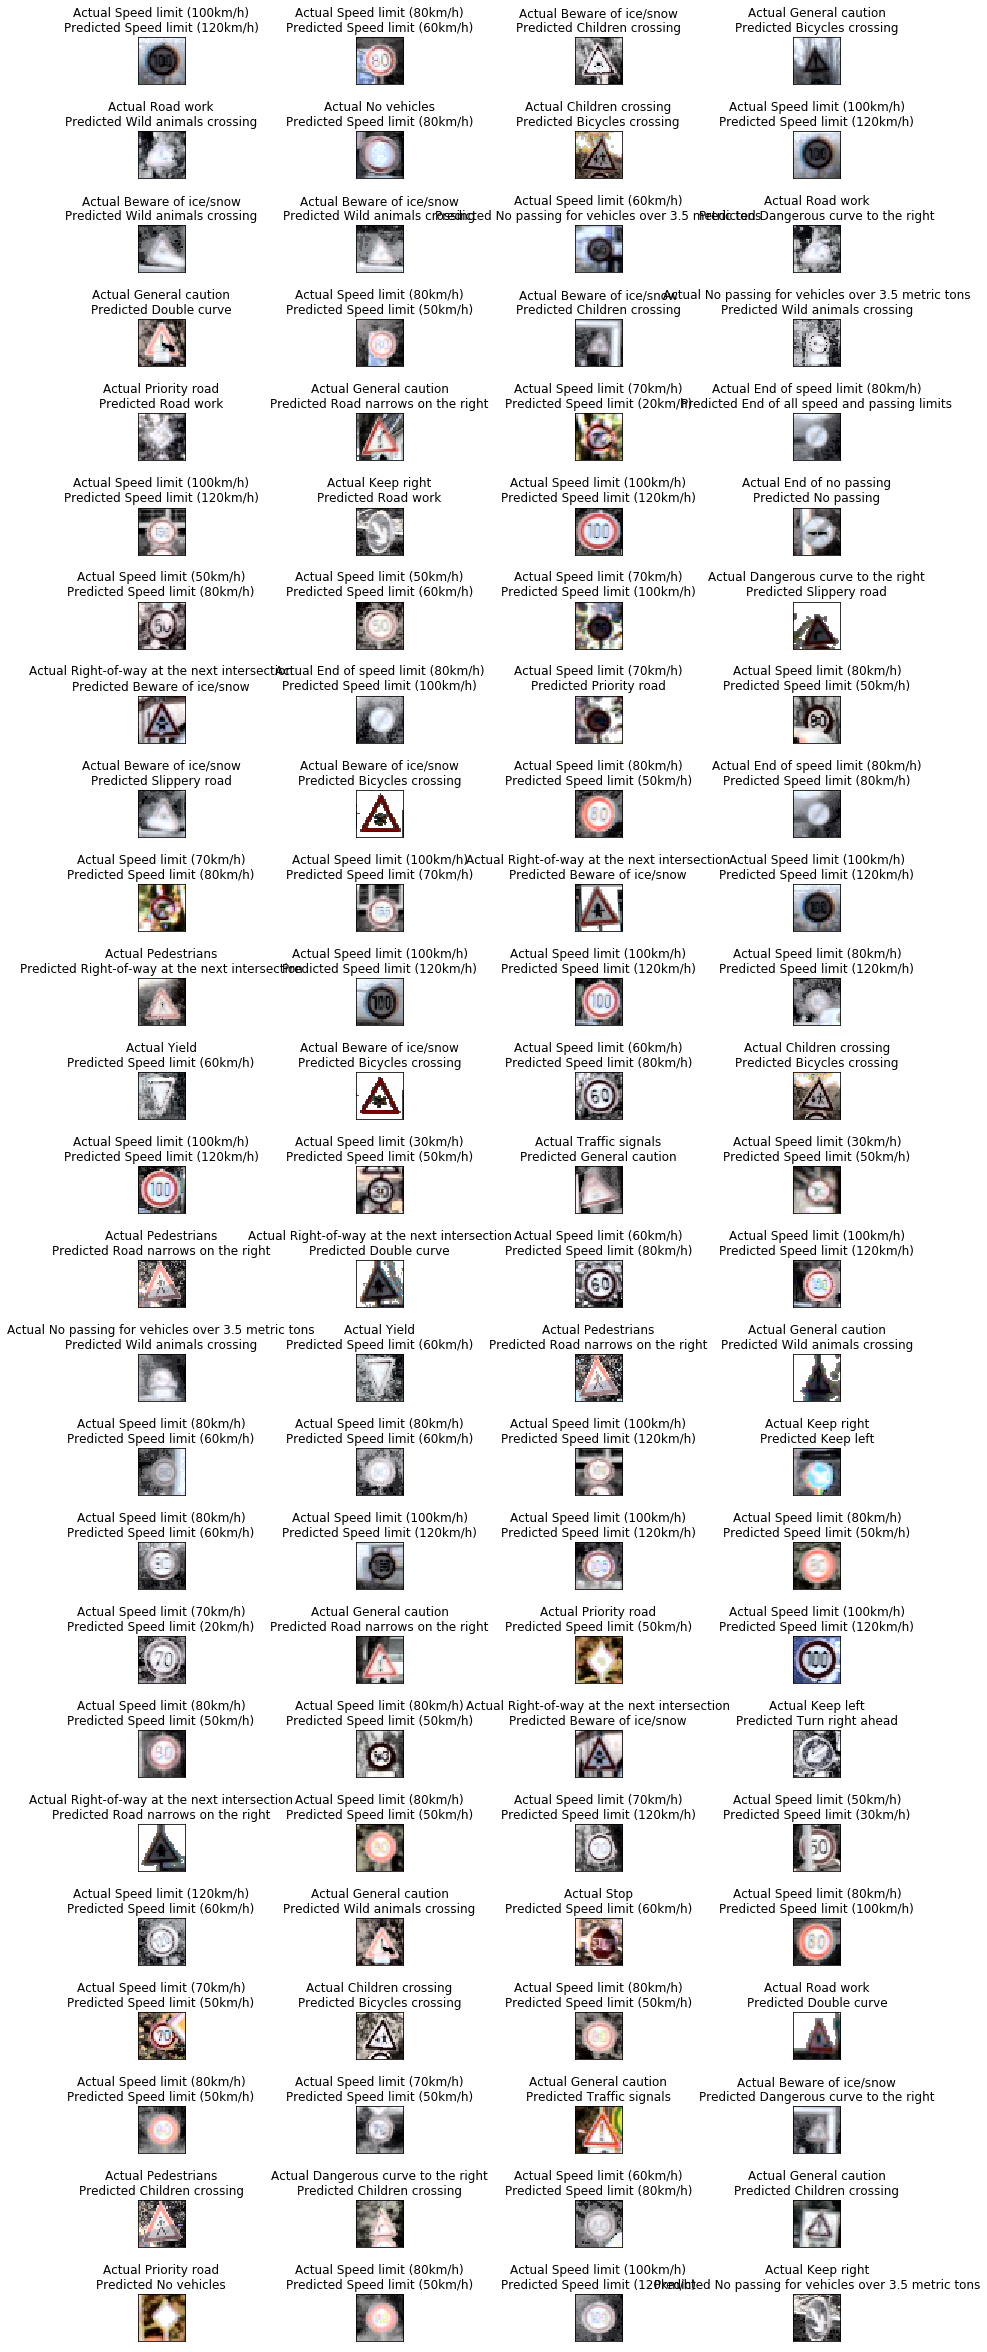

In [29]:
misclassified_idx = np.where(np.not_equal(y_test, metrics['predicted_labels']))
M = X_test[misclassified_idx][:100]

gs = gridspec.GridSpec(25, 4, top=8., bottom=0., right=2., left=0., hspace=1, wspace=0.05)

for i,g in enumerate(gs):
    ax = plt.subplot(g)
    ax.imshow(M[i])
    ax.set_title("Actual {}\nPredicted {}".format(sign_names[y_test[misclassified_idx][i]][1],
                                                        sign_names[predicted_labels[misclassified_idx][i]][1]))
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

#### Analyse the class-wise Precision & Recall

This tells that how the model worked in general (General Behavior), and we get to know the classes with very low precision or recall values. Then, inspect such class samples to see which other images they get confused with.

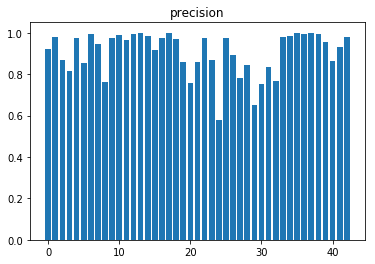

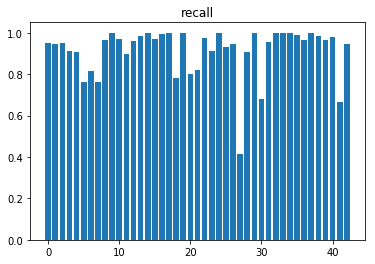

In [30]:
plt.bar(range(n_classes), metrics['precision'])
plt.title('precision')
plt.show()
plt.bar(range(n_classes), metrics['recall'])
plt.title('recall')
plt.show()

In [31]:
low_precision_classes = np.argsort(metrics['precision'])[:3]
low_recall_classes    = np.argsort(metrics['recall'])[:3]
print("Low precision classes:", low_precision_classes)
print("Low recall classes:", low_recall_classes)

Low precision classes: [24 29 30]
Low recall classes: [27 41 30]


For each low precision classes, find the class that gives maximum false positives. 
> These are found in columns of the confusion matrix. 

For each low recall classes, find the class that gives maximum false negatives. 
> These are found in rows on the confusion matrix.

In [32]:
# Get a copy of the confusion matrix excluding true positives.
conf_mat = np.copy(metrics['confmat'])
np.fill_diagonal(conf_mat,0)

# For each class with low precision, get class that causes most false positives.
false_positive_classes = np.argmax(conf_mat[:, low_precision_classes], axis=0)
print("False positive classes:", false_positive_classes)

# For each class with low recall, get class that causes most false negatives.
false_negative_classes = np.argmax(conf_mat[low_recall_classes,:], axis=1)
print("False negative classes:", false_negative_classes)

False positive classes: [18 28 11]
False negative classes: [24 32 29]


##### Below, Low Precision Classes

Actual class: [18 'General caution']


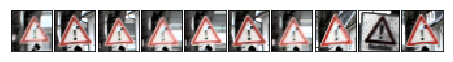

Predicted as class: [24 'Road narrows on the right']


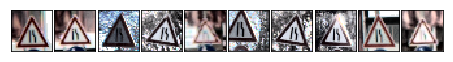




Actual class: [28 'Children crossing']


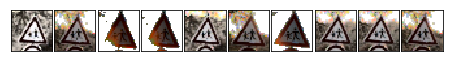

Predicted as class: [29 'Bicycles crossing']


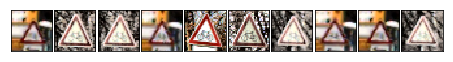




Actual class: [11 'Right-of-way at the next intersection']


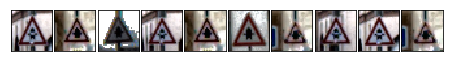

Predicted as class: [30 'Beware of ice/snow']


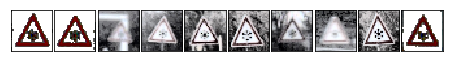

In [42]:
for i in range(len(low_precision_classes)):
    # Get misclassified samples from false positive class.
    fp_idx = np.logical_and(np.squeeze(y_test==false_positive_classes[i]),
                                np.squeeze(predicted_labels==low_precision_classes[i]))
                                
    fp_samples = X_test[fp_idx]
    
    # Get (representative) samples from the target class.
    target_idx = np.where(y_test == low_precision_classes[i])
    target_samples = X_test[target_idx]
    
    print("Actual class:", sign_names[false_positive_classes[i]])
    plot_random_samples(fp_samples,10)
    print("Predicted as class:", sign_names[low_precision_classes[i]])
    plot_random_samples(target_samples, 10)
    print("\n\n")

##### Below, Low Recall Classes

Actual class: [27 'Pedestrians']


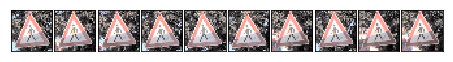

Predicted as class: [24 'Road narrows on the right']


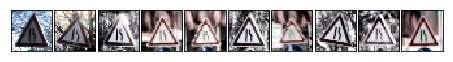




Actual class: [41 'End of no passing']


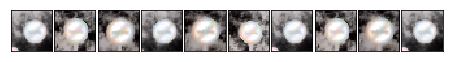

Predicted as class: [32 'End of all speed and passing limits']


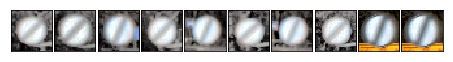




Actual class: [30 'Beware of ice/snow']


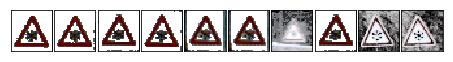

Predicted as class: [29 'Bicycles crossing']


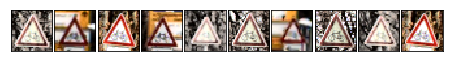

In [43]:
for i in range(len(low_recall_classes)):
    # Get misclassified samples from target class.
    target_idx = np.logical_and(np.squeeze(y_test==low_recall_classes[i]),
                                np.squeeze(predicted_labels==false_negative_classes[i]))
                                
    target_samples = X_test[target_idx]
    
    # Get (representative) samples from the false negative class.
    fp_idx = np.where(y_test == false_negative_classes[i] )
    fp_samples = X_test[fp_idx]
    
    print("Actual class:", sign_names[low_recall_classes[i]])
    plot_random_samples(target_samples, 10)
    print("Predicted as class:", sign_names[false_negative_classes[i]])
    plot_random_samples(fp_samples, 10)
    print("\n\n")

### Discussion (5):
**<i>Analyzing the Model Performance</i>**

Because the validation set is small and not augmented either, a high validation set accuracy (~99%) didn't translate into as good a test accuracy (~93%). Above, some misclassified samples have been plotted aloghwith their target labels. For many examples, why the misclassfication would have occured or why the model got confused seems obvious like: Motion Blur, pixelation, Over-exposure etc. As discussed above, e.g., The sign of Speed Limit 60 km/h could be easily confused with that of 80 km/h in a blurred image as the digits would almost look alike in shape.

More insight is obtained by computing the confusion matrix, and precision and recall values. Some finer high-level features seem to be overlooked by the model. E.g., 'General Caution' with an exclaimation mark and 'Pedestrian' with a human in the middle, both, have been confused with 'Road narrows on the right'.


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

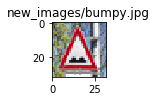

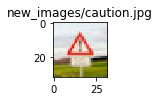

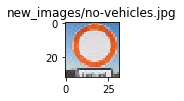

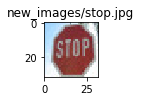

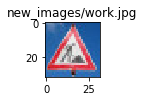

In [36]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import scipy.ndimage as ndimage

new_files=['new_images/bumpy.jpg','new_images/caution.jpg',
           'new_images/no-vehicles.jpg','new_images/stop.jpg','new_images/work.jpg']

X_new = np.zeros([len(new_files),32,32,3], dtype=np.uint8)
y_new = np.array([22,18,15,14,25], dtype=np.uint8) # Known Label Ids from the Signnames.csv for the new images, by human eye.

for i in range(len(new_files)):
    X_new[i] = ndimage.imread(new_files[i])
    
    plt.figure(figsize=(1,1))
    plt.imshow(X_new[i])
    plt.title(new_files[i])
    plt.show()

### Predict the Sign Type for Each Image

In [37]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [38]:
X_new = hist_equalize(X_new)
X_new_norm = X_new - pixel_means
X_new_norm = X_new_norm / (pixel_stddevs + 1e-6) #avoid division by 0

new_images_metrics = compute_key_metrics(session, X_new_norm, y_new)

100%|██████████| 1/1 [00:00<00:00, 20.57it/s]


### Analyze Performance

In [44]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print("Acuracy for new test images: ", np.sum(new_images_metrics['predicted_labels']==y_new)/len(y_new))

Acuracy for new test images:  0.8


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Actual label: [22 'Bumpy road']
Predicted classes and probabilities  [(22, 1.0), (26, 0.0), (25, 0.0), (20, 0.0), (28, 0.0)]


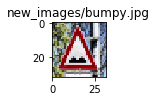

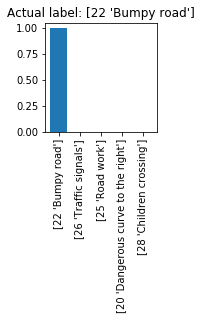

-----------------------------------------------------
Actual label: [18 'General caution']
Predicted classes and probabilities  [(20, 0.97000003), (26, 0.0099999998), (23, 0.0), (31, 0.0), (18, 0.0)]


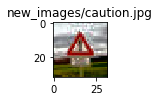

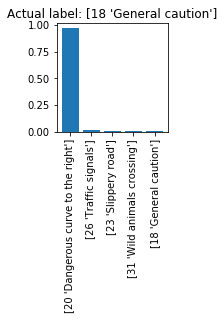

-----------------------------------------------------
Actual label: [15 'No vehicles']
Predicted classes and probabilities  [(15, 1.0), (9, 0.0), (8, 0.0), (7, 0.0), (3, 0.0)]


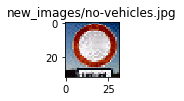

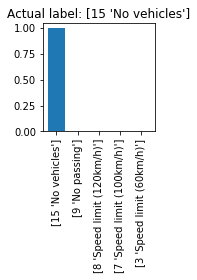

-----------------------------------------------------
Actual label: [14 'Stop']
Predicted classes and probabilities  [(14, 1.0), (3, 0.0), (8, 0.0), (5, 0.0), (17, 0.0)]


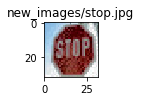

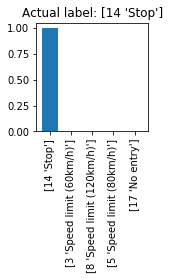

-----------------------------------------------------
Actual label: [25 'Road work']
Predicted classes and probabilities  [(25, 1.0), (22, 0.0), (29, 0.0), (19, 0.0), (20, 0.0)]


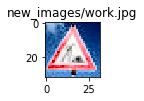

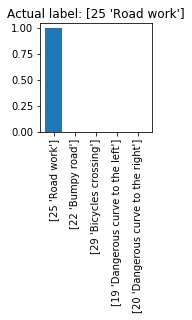

-----------------------------------------------------


In [45]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

top5 = session.run(tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict={X: X_new_norm, y: y_new, keep_prob:1.0})
    
for i in range(len(y_new)):
    print("Actual label: {}".format(sign_names[y_new[i]]))
    print("Predicted classes and probabilities ", list(zip(top5[1][i], np.round(top5[0][i], 2))))
    plt.figure(figsize=(1,1))
    plt.imshow(X_new[i])
    plt.title(new_files[i])
    plt.show()
    plt.figure(figsize=(2,2))
    plt.bar(range(5), top5[0][i])
    plt.title("Actual label: {}".format(sign_names[y_new[i]]))
    plt.xticks(range(5), sign_names[top5[1][i]], rotation='vertical')
    plt.show()
    print("-----------------------------------------------------")

### Discussion (6):
**<i>Testing the Model on New Images</i>**

5 arbitrarily chosen images of German traffic signs have been downloaded off the web and saved in '/new_images' folder. These images are shown below alongwith a reason for why the model could misclassify them.

![alt text](./new_images/bumpy.jpg) <center>The Attached pole is visible in the image</center>
![alt text](./new_images/caution.jpg) <center>This is a very blurry sign, also very tiny</center>
![alt text](./new_images/no-vehicles.jpg "Visualization") <center>Text below the image is somewhat visible</center>
![alt text](./new_images/stop.jpg "Visualization") <center>The image is not in parallel perspective</center>
![alt text](./new_images/work.jpg "Visualization") <center>The image is blurred</center>

Below are the prediction results:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Bumpy Road      		| Bumpy Road   									| 
| General Caution    	| Dangerous curve to the right					|
| No Vehicles			| No Vehicles									|
| Stop  	      		| Stop					 				        |
| Road Work      		| Road Work      							    |

The trained model is able to correctly guess 4 of the 5 traffic signs, i.e. it has an accuracy of 80%. 
> This is far less than the ~93% accuracy yieded on the test set. But, here, a sample size is too smalll to draw any conclusions. It's just that the model may be tweaked to make it more generalized so that it is not overfitted.

1. For the first image, the model is confidently certain that it is a bumpy road sign (probability of 1.0). The top five soft max probabilities for this image are:

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 1.0         			| Bumpy Road   									| 
| 0.0    				| Traffic Signals 								|
| 0.0					| Road Work										|
| 0.0	      			| Dangerous curve to the right					|
| 0.0				    | Children Crossing     						|

2. For the second image of a general caution sign, the classifier didn't output the correct label in top 5. Instead the labels predicted are as below:

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 1.0         			| Dangerous curve to the right   				| 
| 0.05    				| Traffic Signals 								|
| 0.02					| Slippery Road									|
| 0.02	      			| Wild animals crossing					        |
| 0.02				    | General Caution     						    |

3. For the third image of no vehicles sign, the best prediction is correct and has a high probability of 1.0. All other predictions have 0 probability.

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 1.0         			| No Vehicle   									| 
| 0.0    				| No passing 								    |
| 0.0					| Speed Limit (120 Km/hr)						|
| 0.0	      			| Speed Limit (100 Km/hr)				    	|
| 0.0				    | Speed Limit (60 Km/hr)    					|

4. For the fourth image of a stop sign, the correct label has probability 1.0 while others have 0.0 probability.

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 1.0         			| Stop  									    | 
| 0.0    				| Speed Limit (60 Km/hr) 						|
| 0.0					| Speed Limit (120 Km/hr)						|
| 0.0	      			| Speed Limit (80 Km/hr)				    	|
| 0.0				    | No Entry     			            			|

5. For the fifth image of road work, the model is confidently certain about the prediction, which is also the the correct label with a probaility of 1.0. Other probabilites are 0.0 again.

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 1.0         			| Road Work   									| 
| 0.0    				| Bumpy Road 								    |
| 0.0					| Bicycles Crossing						    	|
| 0.0	      			| Dangerous curve to the left					|
| 0.0				    | Dangerous curve to the right     				|

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [48]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=session,feed_dict={X : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

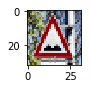

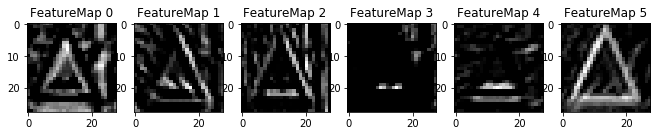

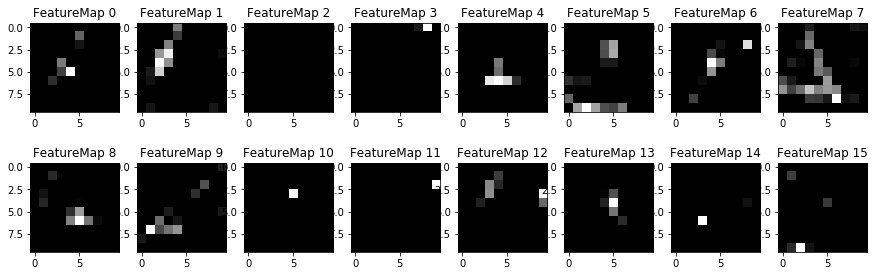

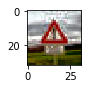

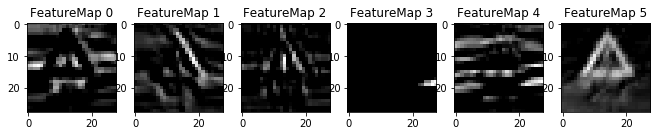

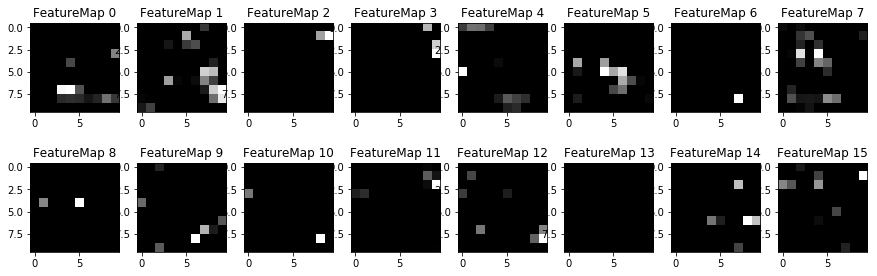

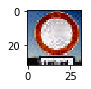

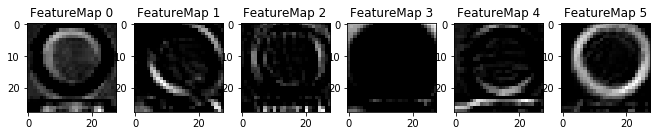

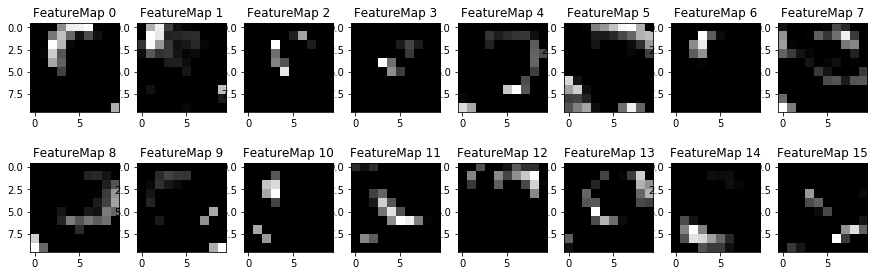

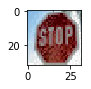

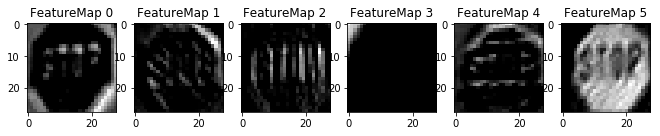

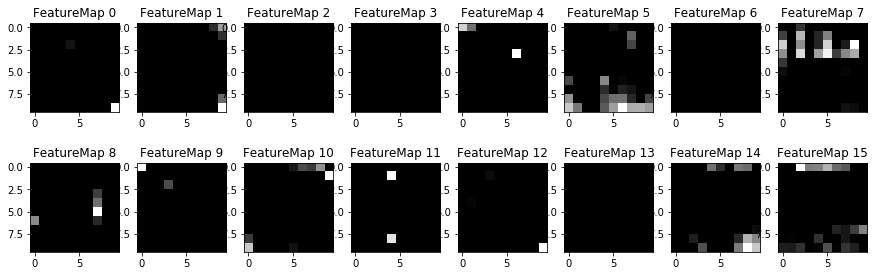

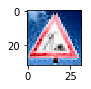

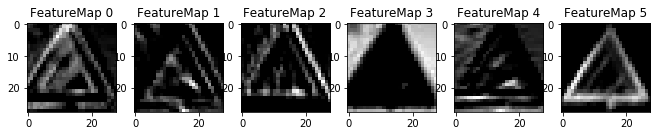

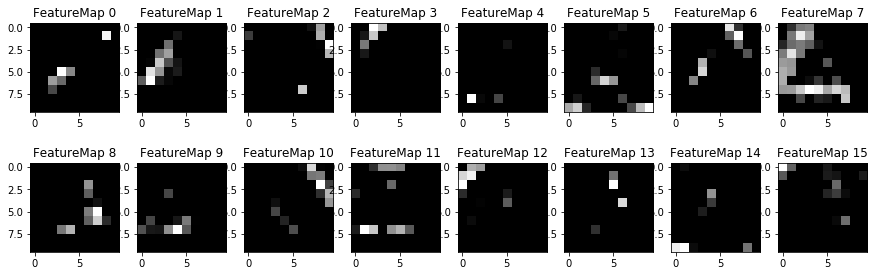

In [49]:
for i in range(len(y_new)):
    plt.figure(figsize=(1,1))
    plt.imshow(X_new[i])
    plt.show()
    outputFeatureMap(X_new_norm[i:i+1,:,:,:],conv1_out)
    plt.show()
    outputFeatureMap(X_new_norm[i:i+1,:,:,:],conv2_out)
    plt.show()

### Discussion (7):
##### Visual Output of the trained network's feature maps:

The 5 new test images from the web have been passed throught the network above and the activation maps of the convolution layers are visualized. 

**<i>Does this show that the network learned interesting characteristics in traffic sign images through hierarchical stages?</i>**

- 1. From above observations, the first convoutional layer has recognized edges and outlines. These outlines of important shapes, objects and text boundaries are visible in the activtion maps. Such learning of edge detection can classify most of signs correctly.
- 2. In case of the only misclassified 'caution', the first convolutional layer has detected certain triangular outlines of the signboard. The '!' symbol in the middle though seems to trigger activations but it is not clear what could possibly have misled the classifier to predict a 'dangerous curve to the right'.
- 3. Visualization of the second convolutional layer does not give much insight becasue the feature maps are very subtle to be interpreted directly. If we visualize the activations of these layers, it may help us understand the cause of high false positive and negative rates.